In [1]:
from cryosparc.tools import CryoSPARC
import json
import numpy as np
import pandas as pd
import plotnine
from plotnine import ggplot, aes
with open('/u/rposert/instance-info.json', 'r') as f:
    instance_info = json.load(f)

In [3]:
cs = CryoSPARC(**instance_info)
assert cs.test_connection()

Connection succeeded to CryoSPARC command_core at http://cryoem0.sbi:40002
Connection succeeded to CryoSPARC command_vis at http://cryoem0.sbi:40003
Connection succeeded to CryoSPARC command_rtp at http://cryoem0.sbi:40005


In [14]:
project_id = "P297"
workspace_id = "W1"
job_id = "J45"

project = cs.find_project(project_id)
flex_train = project.find_job(job_id)
particles = flex_train.load_output('particles')

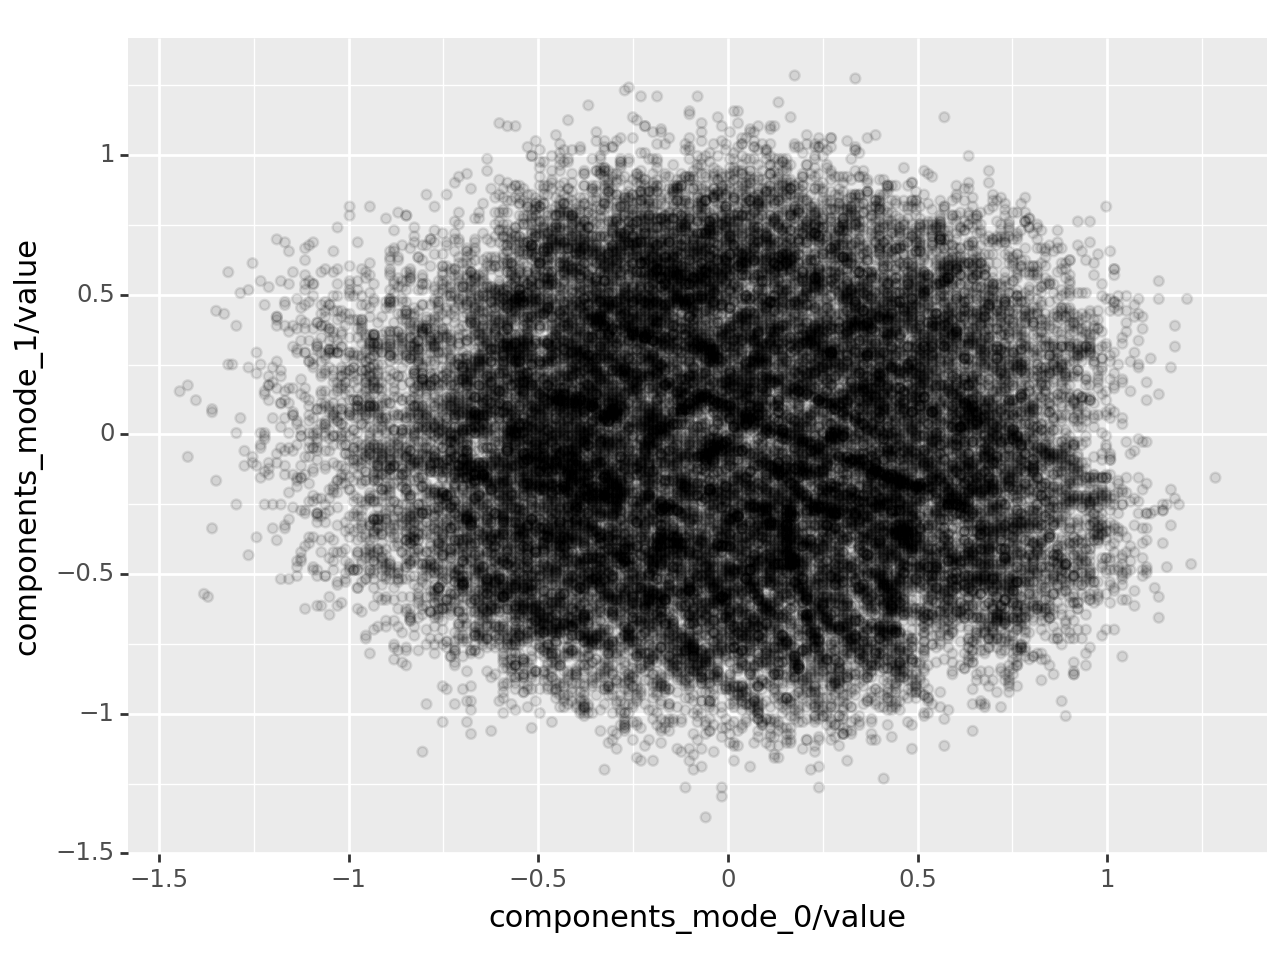

<Figure Size: (640 x 480)>

In [15]:
pre_filter = pd.DataFrame(particles.rows())
(ggplot(pre_filter, aes('components_mode_0/value', 'components_mode_1/value'))
 + plotnine.geom_point(alpha = 0.1))

In [11]:
bool_mask = np.sqrt(particles['components_mode_0/value']**2 + particles['components_mode_1/value']**2) > 0.75
outliers_only = particles.mask(bool_mask)


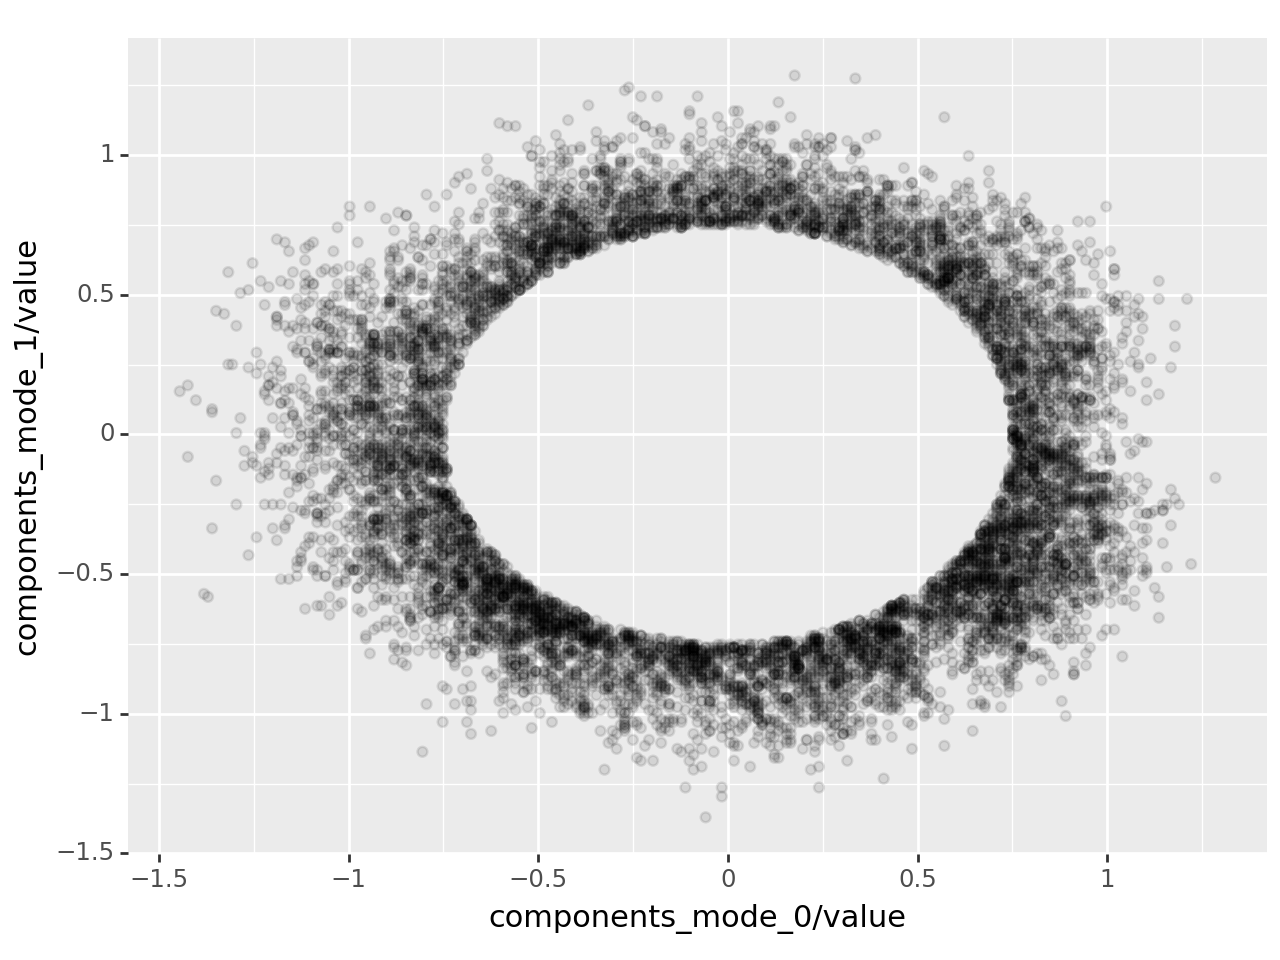

<Figure Size: (640 x 480)>

In [12]:
post_filter = pd.DataFrame(outliers_only.rows())
(ggplot(post_filter, aes('components_mode_0/value', 'components_mode_1/value'))
 + plotnine.geom_point(alpha = 0.1))

In [29]:
project.save_external_result(
    workspace_uid=workspace_id,
    dataset=outliers_only,
    type="particle",
    slots=['blob'],
    passthrough=(job_id, "particles"),
    title="Silly outlier filter"
)

'J207'